In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import qutip as qt
import math

In [2]:
def gaussian_sqrt(_t, _mu=0., _sigma=1.):
    x = float(_t-_mu) / _sigma
    return math.sqrt(math.exp( - x*x/2.) / math.sqrt(2 * np.pi) / _sigma)

In [150]:
def g_u_gaussian(_t, _args):
    mu = _args['mu']
    sigma = _args['sigma']
    x = (_t - mu) / (math.sqrt(2)*sigma)
    denominator = math.sqrt(1 - 0.5*(1 + sp.special.erf(x)))
    #print(gaussian_sqrt(_t, mu, sigma))
    #print(denominator)
    #if denominator < 1e-7:
        #print('t = ', _t)
        #print('x = ', x)
        #print('erf = ', sp.special.erf(x))
        #print('denominator = ', denominator)
        #x = (_t - 0.0009 - mu) / (math.sqrt(2)*sigma)
        #x -= 0.05
        #denominator *= 10**3
        #eps = 0.2
        #denominator = 1 - 0.5*(1 + sp.special.erf(x))
        #print(denominator)
        #return 0
    return gaussian_sqrt(_t, mu, sigma) / denominator

In [156]:
MU = 4
SIGMA = 1
tlist = np.linspace(0, MU + 4*SIGMA, 10000)
gaussian_values = [ gaussian_sqrt(t,4.) for t in tlist ]
g_u_gaussian_sq = [ np.abs(g_u_gaussian(t,_args={'mu':MU,'sigma':SIGMA}))**2 for t in tlist]


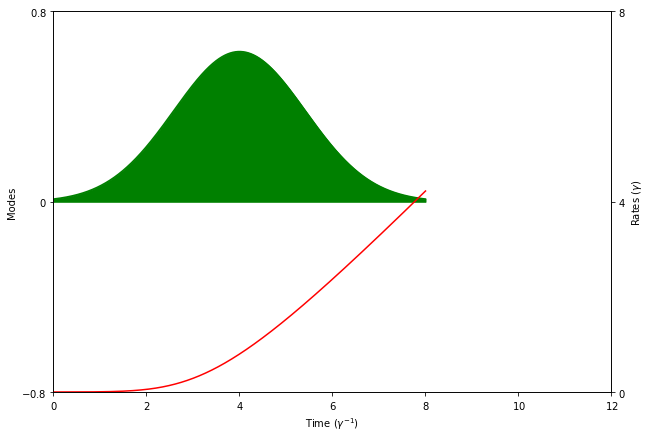

In [157]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax1.set_ylabel('Modes')
ax1.plot(tlist, gaussian_values, '-g')
ax1.fill_between(tlist, gaussian_values, color='green')
ax1.set_xlabel('Time ($\gamma^{-1}$)')
ax1.set_xlim(0, 12)
ax1.set_xticks([0., 2, 4, 6, 8, 10, 12],
               labels=["$0$", "$2$", "$4$", "$6$", "$8$", "$10$", "$12$"])
ax1.set_yticks([-0.8, 0, 0.8], labels=["$-0.8$", "$0$", "$0.8$"])

ax2 = ax1.twinx()
ax2.set_ylabel('Rates ($\gamma$)')
ax2.plot(tlist, g_u_gaussian_sq, '-r')
ax2.set_ylim(0, 8)
ax2.set_yticks([0,4,8], labels=["$0$", "$4$", "$8$"])

plt.show()

In [165]:
adaga_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/adaga_expect_values.dat")
cdagc_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/cdagc_expect_values.dat")

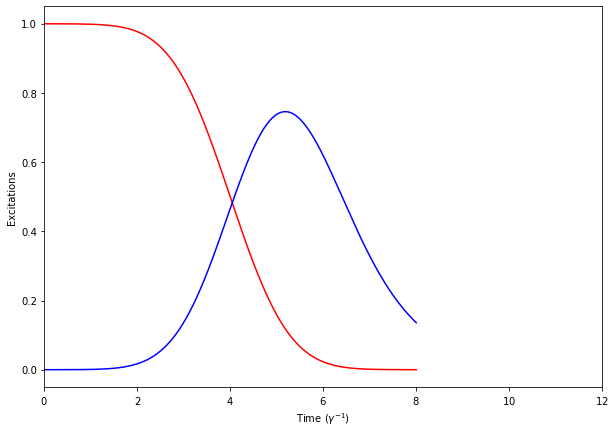

In [166]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax1.set_ylabel('Excitations')
ax1.plot(tlist, adaga_expect_values, '-r', tlist, cdagc_expect_values, '-b')
ax1.set_xlabel('Time ($\gamma^{-1}$)')
ax1.set_xlim(0, 12)
ax1.set_xticks([0., 2, 4, 6, 8, 10, 12],
               labels=["$0$", "$2$", "$4$", "$6$", "$8$", "$10$", "$12$"])
plt.show()

In [6]:
audagau_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/audagau_expect_values.dat")
cdagc_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/cdagc_expect_values.dat")
avdagav_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/avdagav_expect_values.dat")

[]

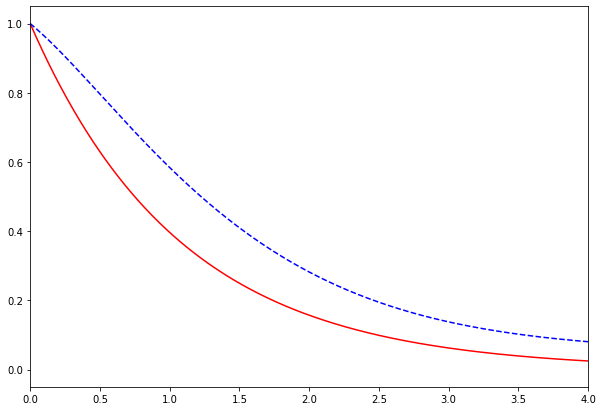

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, audagau_expect_values, '-r', tlist, cdagc_expect_values, '--b')
ax.set_xlim(0,4)

plt.plot()